# Support Vector Machine - Regression (SVR)

Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences. First of all, because output is a real number it becomes very difficult to predict the information at hand, which has infinite possibilities. In the case of regression, a margin of tolerance (epsilon) is set in approximation to the SVM which would have already requested from the problem. But besides this fact, there is also a more complicated reason, the algorithm is more complicated therefore to be taken in consideration. However, the main idea is always the same: to minimize error, individualizing the hyperplane which maximizes the margin, keeping in mind that part of the error is tolerated. 

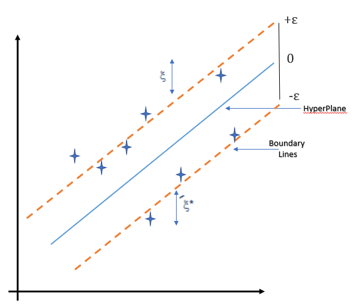

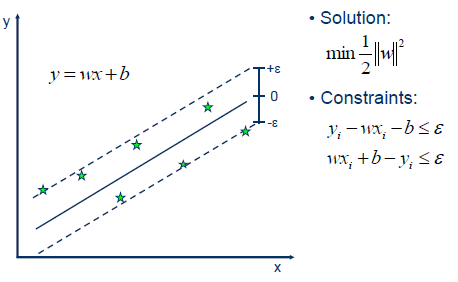

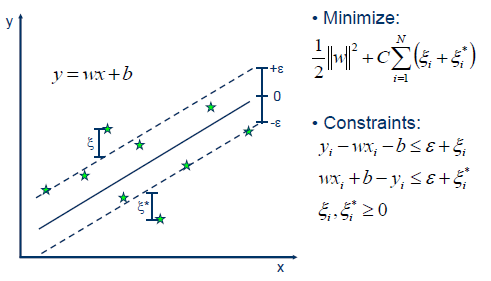

# Linear SVR

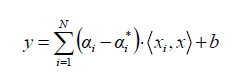

# Non-linear SVR		
The kernel functions transform the data into a higher dimensional feature space to make it possible to perform the linear separation.

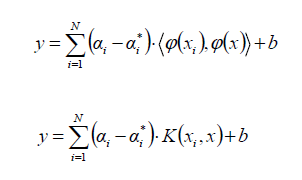

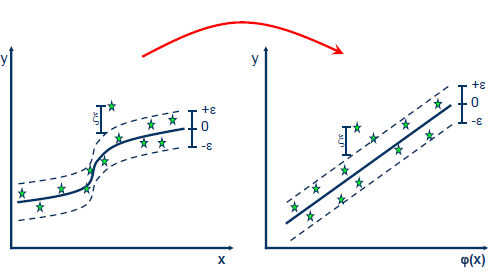

# Kernel functions

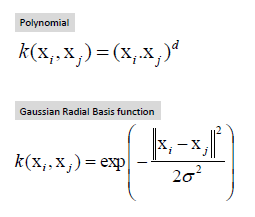

# code

In [1]:
from sklearn.datasets import load_boston

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
df=pd.DataFrame(data.data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
features = data['data']
labels = data['target']
features,labels

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 1

In [6]:
features.shape, labels.shape

((506, 13), (506,))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [33]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_data, labels, test_size=0.23, random_state=42)

X_train, X_test, y_train, y_test

(array([[16.51],
        [12.01],
        [ 6.36],
        [12.5 ],
        [ 5.9 ],
        [20.62],
        [10.3 ],
        [ 5.81],
        [ 7.7 ],
        [ 6.36],
        [ 4.82],
        [15.02],
        [ 3.76],
        [27.26],
        [ 7.34],
        [13.04],
        [17.09],
        [28.32],
        [12.03],
        [ 8.51],
        [ 3.95],
        [ 4.38],
        [16.3 ],
        [14.67],
        [ 4.97],
        [10.24],
        [23.98],
        [27.38],
        [10.59],
        [15.12],
        [19.52],
        [19.88],
        [ 4.63],
        [16.22],
        [16.44],
        [ 5.21],
        [12.04],
        [10.21],
        [ 6.58],
        [18.13],
        [ 7.79],
        [ 2.94],
        [22.98],
        [13.15],
        [13.15],
        [13.  ],
        [ 6.87],
        [10.45],
        [11.98],
        [ 5.91],
        [18.03],
        [14.81],
        [19.15],
        [13.35],
        [12.27],
        [ 8.77],
        [ 4.59],
        [14.36],
        [15.37

In [40]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

features_data = SelectKBest(mutual_info_regression, k=1).fit_transform(features, labels)
features_data

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [41]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [42]:
y_pred = svr.predict(X_test)
y_pred

array([22.73839613, 32.3585094 , 15.95913058, 28.70410353, 16.81997445,
       20.83123424, 15.68717867, 12.86887284, 20.43940312, 19.59668031,
       16.11843044, 17.0041733 , 15.65950145, 20.67514511, 20.92833908,
       20.96254858, 16.48398318, 13.76626003, 33.08938313, 15.89586301,
       26.54309339, 25.41801677, 12.94346348, 22.13340345, 18.45095442,
       15.88534603, 22.6742798 , 15.30219753, 16.81997445, 19.75419035,
       19.32950597, 25.4001228 , 20.15180868, 21.73783055, 13.35080337,
       18.36439597, 31.56564693, 22.0263778 , 19.35273377, 24.8112547 ,
       13.43768513, 24.82800943, 33.1893184 , 20.33356811, 22.99743886,
       16.99335206, 15.66651631, 26.2915626 , 17.86392966, 29.79636117,
       20.24232441, 30.55496319, 15.29230416, 24.59671954, 32.86193605,
       21.49215235, 17.55067672, 32.64020658, 22.1761085 , 15.55361535,
       22.28219886, 30.13131321, 32.00859146, 20.94968298, 28.7654595 ,
       12.87708036, 16.98252855, 26.2915626 , 31.0559994 , 15.01

In [43]:
from sklearn.metrics import r2_score, mean_squared_error

In [44]:
print(r2_score(y_pred, y_test))

0.027911182739566054


In [45]:
print(mean_squared_error(y_pred, y_test))

31.34929064044422
